<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/M3_AI1_AlvaradoRuizJoseArmando.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PADAWAN : JOSE ARMANDO ALVARADO RUIZ**

# **ENTREGA: M3_AI1_CONSULTA DE LA EUROSTAT**

Descripción de la tarea:

A partir del generador de consultas de Eurostat construye una consulta a la API de Eurostat para obtener datos del nivel de satisfacción (código del dataset: ilc_pw01) en Europa.

El colectivo objetivo del estudio es:

- Nivel de educación (isced11): Tertiary education ED5-8
- Indicador (indic_wb):   JOBSAT
- Género (sex): T – Total
- Edad (age): Y25-34 – From 25 to 34 years

Los datos que se piden son:

Crea una variable string con la url de la llamada al api de Eurostat para obtener los datos del colectivo objetivo del estudio. Ejemplo: urlEUROSTAT = "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/XXX...... "


Crea un diccionario con el objeto JSON que se obtiene al realizar la petición a la API de la consulta del punto anterior. Imprime por pantalla el elemento "dimension" del diccionario creado.

Puedes utilizar la función urlopen() de la librería urllib.request. 
Descarga los datos de Satisfacción en Europa (código del dataset: ilc_pw01) en formato pandas a partir de la función get_data_df() de librería eurostat.
Para instalar la librería Eurostat ejecuta en colab: !pip install eurostat
Filtra el conjunto de datos solicitados en el punto 1 directamente en este Data Frame y presenta las 6 primeras filas.

Construye un gráfico donde se presente el nivel de satisfacción en cada país del colectivo objetivo del estudio en el año 2018.

- ¿En qué país están más satisfechos con el trabajo en 2018? 
- ¿En qué país están menos satisfechos?

In [4]:
# Instalamos libreria eurostat
!pip install eurostat

     |████████████████████████████████| 45 kB 1.2 MB/s 
     |████████████████████████████████| 49 kB 3.3 MB/s 
  Created wheel for jsonpath-rw: filename=jsonpath_rw-1.4.0-py3-none-any.whl size=15147 sha256=1e31901a0467b8eb98f8b8bea77330e9466b5fbdc5a226bdc27c507aef5b4f16
  Stored in directory: /root/.cache/pip/wheels/58/88/2a/8d619cf38d7cf939e54b6ccdece05d31b64b3eb419c11d1ed3
Successfully built jsonpath-rw


In [36]:
# Cargamos Librerias 

import pandas as pd
import numpy as np
import json
import eurostat
from urllib.request import urlopen
import os
import seaborn as sns
import matplotlib.pyplot as plt

Despues de utlizar el generador de consulta se obtiene la siguiente URL:

In [2]:
url_eurostat = "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/ilc_pw01?precision=1&sex=T&indic_wb=JOBSAT&isced11=ED5-8&age=Y25-34"

In [3]:
result = json.load(urlopen(url_eurostat))
print(result['dimension'])

{'unit': {'label': 'unit', 'category': {'index': {'RTG': 0}, 'label': {'RTG': 'Rating (0-10)'}}}, 'isced11': {'label': 'isced11', 'category': {'index': {'ED5-8': 0}, 'label': {'ED5-8': 'Tertiary education (levels 5-8)'}}}, 'indic_wb': {'label': 'indic_wb', 'category': {'index': {'JOBSAT': 0}, 'label': {'JOBSAT': 'Job satisfaction'}}}, 'sex': {'label': 'sex', 'category': {'index': {'T': 0}, 'label': {'T': 'Total'}}}, 'age': {'label': 'age', 'category': {'index': {'Y25-34': 0}, 'label': {'Y25-34': 'From 25 to 34 years'}}}, 'geo': {'label': 'geo', 'category': {'index': {'AL': 0, 'AT': 1, 'BE': 2, 'BG': 3, 'CH': 4, 'CY': 5, 'CZ': 6, 'DE': 7, 'DK': 8, 'EA': 9, 'EA18': 10, 'EA19': 11, 'EE': 12, 'EL': 13, 'ES': 14, 'EU': 15, 'EU27_2007': 16, 'EU27_2020': 17, 'EU28': 18, 'FI': 19, 'FR': 20, 'HR': 21, 'HU': 22, 'IE': 23, 'IS': 24, 'IT': 25, 'LT': 26, 'LU': 27, 'LV': 28, 'ME': 29, 'MK': 30, 'MT': 31, 'NL': 32, 'NO': 33, 'PL': 34, 'PT': 35, 'RO': 36, 'RS': 37, 'SE': 38, 'SI': 39, 'SK': 40, 'TR': 

In [6]:
# Cargamos datos referentes al dataset "ilc_pw01"

df = eurostat.get_data_df("ilc_pw01")

In [8]:
# Mostramos los primeros 5 registros del dataset.
df.head()

,unit,isced11,indic_wb,sex,age,geo\time,2018,2013
0,RTG,ED0-2,ACCSAT,F,Y16-24,AT,NaN,8.6
1,RTG,ED0-2,ACCSAT,F,Y16-24,BE,NaN,7.8
2,RTG,ED0-2,ACCSAT,F,Y16-24,BG,NaN,5.3
3,RTG,ED0-2,ACCSAT,F,Y16-24,CH,NaN,NaN
4,RTG,ED0-2,ACCSAT,F,Y16-24,CY,NaN,8.2


Podemos indicar que el dataset cuenta con 40899 registros con 8 columnas o variables.

In [ ]:
df.shape

(40899, 8)

Las columnas o variables son las siguientes:

In [9]:
df.columns

Index(['unit', 'isced11', 'indic_wb', 'sex', 'age', 'geo\time', 2018, 2013], dtype='object')

Filtramos el dataset con los siguientes filtros:

In [31]:
#Nivel de educación (isced11): Tertiary education ED5-8
#Indicador (indic_wb):   JOBSAT
#Género (sex): T – Total
#Edad (age): Y25-34 – From 25 to 34 years

df_filter = df[(df['isced11'] =="ED5-8") & (df['indic_wb'] =="JOBSAT") & (df['age'] =="Y25-34") & (df['sex'] =="T")]

En esta ocasión, nuestro objetivo de análisis es de 44 registros con las 8 variables.

In [32]:
df_filter.shape

(44, 8)

In [74]:
df_filter

,unit,isced11,indic_wb,sex,age,geo\time,2018,2013
23641,RTG,ED5-8,JOBSAT,T,Y25-34,AL,6.5,NaN
23642,RTG,ED5-8,JOBSAT,T,Y25-34,AT,8.0,8.1
23643,RTG,ED5-8,JOBSAT,T,Y25-34,BE,7.6,7.4
23644,RTG,ED5-8,JOBSAT,T,Y25-34,BG,7.0,6.9
23645,RTG,ED5-8,JOBSAT,T,Y25-34,CH,7.5,NaN
23646,RTG,ED5-8,JOBSAT,T,Y25-34,CY,7.4,7.4
23647,RTG,ED5-8,JOBSAT,T,Y25-34,CZ,7.9,7.9
23648,RTG,ED5-8,JOBSAT,T,Y25-34,DE,7.2,7.1
23649,RTG,ED5-8,JOBSAT,T,Y25-34,DK,7.2,8.0
23653,RTG,ED5-8,JOBSAT,T,Y25-34,EE,7.7,7.6


In [34]:
df_filter['geo\\time'].unique()

array(['AL', 'AT', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EA', 'EA18',
       'EA19', 'EE', 'EL', 'ES', 'EU', 'EU27_2007', 'EU27_2020', 'EU28',
       'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'ME',
       'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO', 'RS', 'SE', 'SI', 'SK',
       'TR', 'UK', 'XK'], dtype=object)

Podemos identificar no solo que existen códigos de países, sino de agrupaciones de países como los siguientes:

- EA :   Euro area 
- EA18 : Euro area - 18 countries (2014)
- EA19 : Euro area - 19 countries (from 2015)
- EU27_2007 : European Union - 27 countries (2007-2013)
- EU27_2020 : European Union - 27 countries (from 2020)
- EU28 : European Union - 28 countries (2013-2020)

Fuente: https://ec.europa.eu/eurostat/ramon/nomenclatures/index.cfm?TargetUrl=LST_NOM_DTL_LINEAR&StrNom=CL_GEO&StrLanguageCode=EN

Para nuestro analisis solo dejaremos los codigos asociados a los países, además del código EU que viene siendo el valor global de Europa.

In [50]:
del_group = ['EA','EA18','EA19','EU27_2007','EU27_2020','EU28']

for country in del_group:
  df_filter.drop(df_filter[ df_filter['geo\\time'] == country ].index , inplace=True)

df_filter.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,unit,isced11,indic_wb,sex,age,geo\time,2018,2013
23641,RTG,ED5-8,JOBSAT,T,Y25-34,AL,6.5,NaN
23642,RTG,ED5-8,JOBSAT,T,Y25-34,AT,8.0,8.1
23643,RTG,ED5-8,JOBSAT,T,Y25-34,BE,7.6,7.4
23644,RTG,ED5-8,JOBSAT,T,Y25-34,BG,7.0,6.9
23645,RTG,ED5-8,JOBSAT,T,Y25-34,CH,7.5,NaN


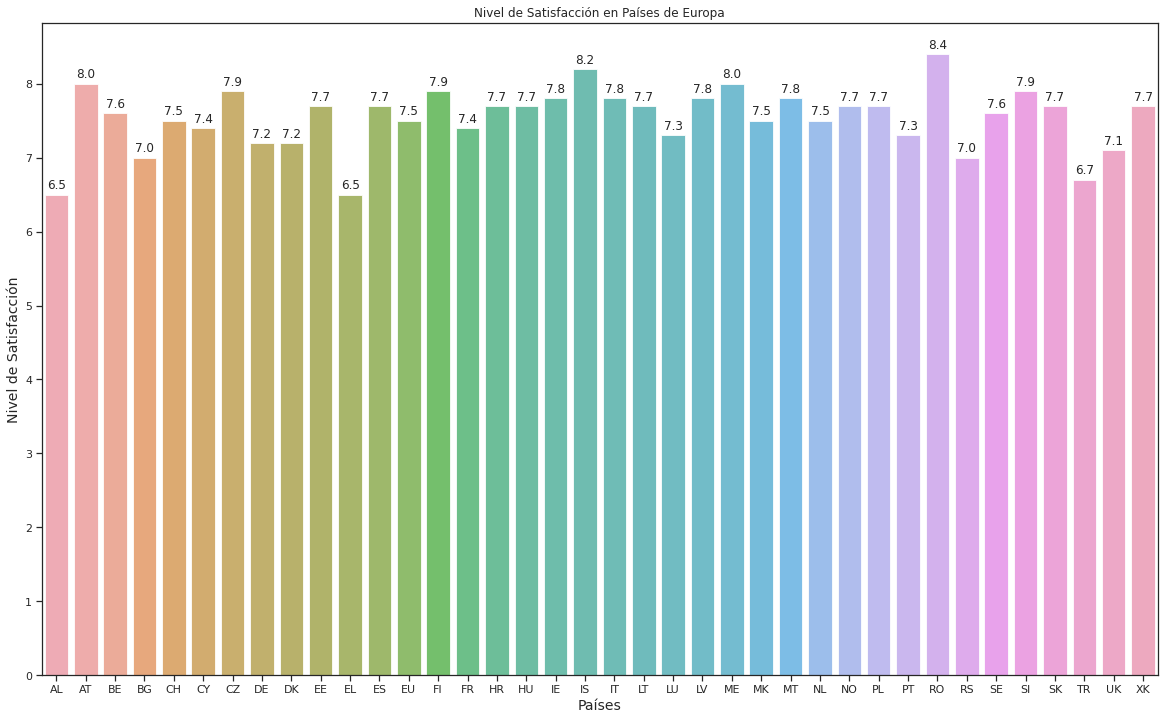

In [51]:
plt.figure(figsize=[20, 12])
sns.set(style="ticks")
bplot = sns.barplot(x = 'geo\\time' , y = 2018, data= df_filter, alpha=0.8)


for p in bplot.patches:
    bplot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.title('Nivel de Satisfacción en Países de Europa');
plt.ylabel('Nivel de Satisfacción', fontsize=14);
plt.xlabel('Países', fontsize=14);

Ahora podemos distinguir que el país con mayor satisfacción en RO (Romania) con un indice de 8.4.

In [43]:
df_filter[df_filter[2018] == df_filter[2018].max()]

,unit,isced11,indic_wb,sex,age,geo\time,2018,2013
23677,RTG,ED5-8,JOBSAT,T,Y25-34,RO,8.4,7.7


Mientras que los países con el menor indice de Satisfacción en Europa son AL (Albania) y EL ()

In [44]:
df_filter[df_filter[2018] == df_filter[2018].min()]

,unit,isced11,indic_wb,sex,age,geo\time,2018,2013
23641,RTG,ED5-8,JOBSAT,T,Y25-34,AL,6.5,NaN
23654,RTG,ED5-8,JOBSAT,T,Y25-34,EL,6.5,6.4


In [80]:
valor_eu = list(df_filter[df_filter['geo\\time'] == 'EU'][2018])[0]
valor_eu

7.5

In [81]:
df_filter[df_filter[2018] >= valor_eu]

,unit,isced11,indic_wb,sex,age,geo\time,2018,2013
23642,RTG,ED5-8,JOBSAT,T,Y25-34,AT,8.0,8.1
23643,RTG,ED5-8,JOBSAT,T,Y25-34,BE,7.6,7.4
23645,RTG,ED5-8,JOBSAT,T,Y25-34,CH,7.5,NaN
23647,RTG,ED5-8,JOBSAT,T,Y25-34,CZ,7.9,7.9
23653,RTG,ED5-8,JOBSAT,T,Y25-34,EE,7.7,7.6
23655,RTG,ED5-8,JOBSAT,T,Y25-34,ES,7.7,6.9
23656,RTG,ED5-8,JOBSAT,T,Y25-34,EU,7.5,NaN
23660,RTG,ED5-8,JOBSAT,T,Y25-34,FI,7.9,8.1
23662,RTG,ED5-8,JOBSAT,T,Y25-34,HR,7.7,7.9
23663,RTG,ED5-8,JOBSAT,T,Y25-34,HU,7.7,7.8


In [82]:
df_filter[df_filter[2018] < valor_eu]

,unit,isced11,indic_wb,sex,age,geo\time,2018,2013
23641,RTG,ED5-8,JOBSAT,T,Y25-34,AL,6.5,NaN
23644,RTG,ED5-8,JOBSAT,T,Y25-34,BG,7.0,6.9
23646,RTG,ED5-8,JOBSAT,T,Y25-34,CY,7.4,7.4
23648,RTG,ED5-8,JOBSAT,T,Y25-34,DE,7.2,7.1
23649,RTG,ED5-8,JOBSAT,T,Y25-34,DK,7.2,8.0
23654,RTG,ED5-8,JOBSAT,T,Y25-34,EL,6.5,6.4
23661,RTG,ED5-8,JOBSAT,T,Y25-34,FR,7.4,7.2
23668,RTG,ED5-8,JOBSAT,T,Y25-34,LU,7.3,7.7
23676,RTG,ED5-8,JOBSAT,T,Y25-34,PT,7.3,6.9
23678,RTG,ED5-8,JOBSAT,T,Y25-34,RS,7.0,7.3
